# PYTHAGOREAN EXPECTATION ON THE ENGLISH FOOTBALL DATA BETWEEN 2017-2018

In soccer, teams score goals, and we can calculate Pythagorean Expectations based on goals scored and goals conceded.

The structure of competition in soccer in most countries around the world is different from most sports. Rather than leagues operating as independent entities, they are connected through a hierarchical system, sometimes called "the pyramid". In England, the English Premier League is at the top of the pyramid (it used to be called the First Division) and contains 20 teams.

Beneath the Premier League is The Football League Championship (it used to be called Division Two) and it contains 24 teams. The Premier League and the Championship are linked via the system of promotion and relegation. At the end of each season, the three worst performing teams (measured by points won in competition) are relegated to play Championship soccer in the following season, to be replaced by the three best performing teams in the Championship. Beneath the Championship are two more leagues - League One (formerly Third Division) and League Two (formerly Fourth Division). These leagues are also linked, hierarchically, through promotion and relegation. Thus it makes sense to think of these four divisions as part of a common system.

In any one season, there are 92 teams in the system. Even though teams compete in different divisions, we can define both win percentage and Pythagorean Expectation for each team, in order to see how well the data fits.

In each of the four divisions, every team plays every other team twice in a season, once at home and once away. There is no playoff, so the champion is the team at the end of the season with the largest number of points (3 points for a win, one for a draw (tie)). Unlike other sports, draws are not only possible but are quite common. We need to adjust our definition of win percentage for this case. To handle this, we'll give a value of 1 for a win, 0 for a loss, and 1/2 for a draw.


Columns in the dataset:
* Div - Division - English premier league, championship, league 2, league 1
* Date - Match date
* HomeTeam - Home team
* AwayTeam - Away team
* FTHG - Full time home goals
* FTAG - Full time away goals
* FTR - Full time result - Home win (H), Away win (A), Draw (D)

### Step 1: Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

pd.set_option('display.max_columns', None)
%matplotlib inline

### Step 2: Load dataset

In [34]:
epl_df = pd.read_excel('datasets/Engsoccer2017-18.xlsx')
epl_df.tail()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
2031,FL2,2018-05-05 00:00:00,Lincoln,Yeovil,1,1,D
2032,FL2,2018-05-05 00:00:00,Mansfield,Crawley Town,1,1,D
2033,FL2,2018-05-05 00:00:00,Notts County,Luton,0,0,D
2034,FL2,2018-05-05 00:00:00,Swindon,Accrington,3,0,H
2035,FL2,2018-05-05 00:00:00,Wycombe,Stevenage,1,0,H


### Step 3: Data Wrangling & Cleaning

In [35]:
epl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2036 entries, 0 to 2035
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Div       2036 non-null   object
 1   Date      2036 non-null   object
 2   HomeTeam  2036 non-null   object
 3   AwayTeam  2036 non-null   object
 4   FTHG      2036 non-null   int64 
 5   FTAG      2036 non-null   int64 
 6   FTR       2036 non-null   object
dtypes: int64(2), object(5)
memory usage: 111.5+ KB


In [36]:
epl_df.describe(include='all')

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
count,2036,2036,2036,2036,2036.000000,2036.000000,2036
unique,4,222,92,92,NaN,NaN,3
top,FLCH,2017-09-09 00:00:00,Charlton,Bristol Rvs,NaN,NaN,H
freq,552,42,23,23,NaN,NaN,890
mean,NaN,NaN,NaN,NaN,1.444990,1.151277,NaN
std,NaN,NaN,NaN,NaN,1.232013,1.110461,NaN
min,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN
75%,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN


In [37]:
epl_df.shape

(2036, 7)

There aren't any missing values and the data is distributed between integer and string columns

### Step 4: Feature Engineering

In [38]:
epl_df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,EPL,2017-11-08 00:00:00,Arsenal,Leicester,4,3,H
1,EPL,2017-12-08 00:00:00,Brighton,Man City,0,2,A
2,EPL,2017-12-08 00:00:00,Chelsea,Burnley,2,3,A
3,EPL,2017-12-08 00:00:00,Crystal Palace,Huddersfield,0,3,A
4,EPL,2017-12-08 00:00:00,Everton,Stoke,1,0,H


In [39]:
# Basing on the pythagorean formula, we need to extract the home and away wins together with the draws. We'll assign a draw to 0.5

epl_df['Hwin'] = np.where(epl_df.FTR == 'H', 1, np.where(epl_df.FTR == 'D', 0.5, 0))
epl_df['Awin'] = np.where(epl_df.FTR == 'A', 1, np.where(epl_df.FTR == 'D', 0.5, 0))
epl_df['Count'] = 1
epl_df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Hwin,Awin,Count
0,EPL,2017-11-08 00:00:00,Arsenal,Leicester,4,3,H,1.0,0.0,1
1,EPL,2017-12-08 00:00:00,Brighton,Man City,0,2,A,0.0,1.0,1
2,EPL,2017-12-08 00:00:00,Chelsea,Burnley,2,3,A,0.0,1.0,1
3,EPL,2017-12-08 00:00:00,Crystal Palace,Huddersfield,0,3,A,0.0,1.0,1
4,EPL,2017-12-08 00:00:00,Everton,Stoke,1,0,H,1.0,0.0,1


In [40]:
# Group the teams to get the total number of goals scored, conceeded, total matches played at home

epl_home_df = epl_df.groupby(['HomeTeam', 'Div'])[['FTHG','FTAG','Hwin','Count']].sum().reset_index()
epl_home_df = epl_home_df.rename(columns = {
    'HomeTeam': 'team',
    'FTHG': 'FTHGh',
    'FTAG': 'FTAGh',
    'Count': 'Gh'
})
epl_home_df.head(1)

,team,Div,FTHGh,FTAGh,Hwin,Gh
0,AFC Wimbledon,FL1,25,30,11.0,23


In [41]:
# Group the teams to get the total number of goals scored, conceeded, total matches played away

epl_away_df = epl_df.groupby(['AwayTeam', 'Div'])[['FTHG','FTAG','Awin','Count']].sum().reset_index()
epl_away_df = epl_away_df.rename(columns = {
    'AwayTeam': 'team',
    'FTHG': 'FTHGa',
    'FTAG': 'FTAGa',
    'Count': 'Ga'
})
epl_away_df.head(1)

,team,Div,FTHGa,FTAGa,Awin,Ga
0,AFC Wimbledon,FL1,28,22,9.0,23


In [42]:
# Merge the two dataframes
epl_df = epl_home_df.merge(epl_away_df, on=['team','Div'])
epl_df.sample(1)

,team,Div,FTHGh,FTAGh,Hwin,Gh,FTHGa,FTAGa,Awin,Ga
25,Chesterfield,FL2,27,33,9.5,23,50,20,4.5,23


In [45]:
# Sum up the total wins, goals scored, goals conceeded, games played
epl_df['W'] = epl_df.Hwin + epl_df.Awin
epl_df['Games'] = epl_df.Gh + epl_df.Ga
epl_df['GF'] = epl_df.FTHGh + epl_df.FTAGa #Goals for
epl_df['GA'] = epl_df.FTAGh + epl_df.FTHGa # Goals against
epl_df.head()

,team,Div,FTHGh,FTAGh,Hwin,Gh,FTHGa,FTAGa,Awin,Ga,W,Games,GF,GA
0,AFC Wimbledon,FL1,25,30,11.0,23,28,22,9.0,23,20.0,46,47,58
1,Accrington,FL2,42,19,18.5,23,27,34,13.5,23,32.0,46,76,46
2,Arsenal,EPL,54,20,16.0,19,31,20,6.0,19,22.0,38,74,51
3,Aston Villa,FLCH,42,19,17.5,23,23,30,12.0,23,29.5,46,72,42
4,Barnet,FL2,24,25,11.0,23,40,22,6.0,23,17.0,46,46,65


In [47]:
# Define the win percentage & pythagorean expectation
epl_df['wpc'] = epl_df.W / epl_df.Games  
epl_df['pyth_e'] = epl_df.GF ** 2 / ((epl_df.GF ** 2) + (epl_df.GA ** 2))
epl_df.head()

,team,Div,FTHGh,FTAGh,Hwin,Gh,FTHGa,FTAGa,Awin,Ga,W,Games,GF,GA,wpc,pyth_e
0,AFC Wimbledon,FL1,25,30,11.0,23,28,22,9.0,23,20.0,46,47,58,0.434783,0.396375
1,Accrington,FL2,42,19,18.5,23,27,34,13.5,23,32.0,46,76,46,0.695652,0.731880
2,Arsenal,EPL,54,20,16.0,19,31,20,6.0,19,22.0,38,74,51,0.578947,0.677974
3,Aston Villa,FLCH,42,19,17.5,23,23,30,12.0,23,29.5,46,72,42,0.641304,0.746114
4,Barnet,FL2,24,25,11.0,23,40,22,6.0,23,17.0,46,46,65,0.369565,0.333701


<Figure size 1000x800 with 0 Axes>

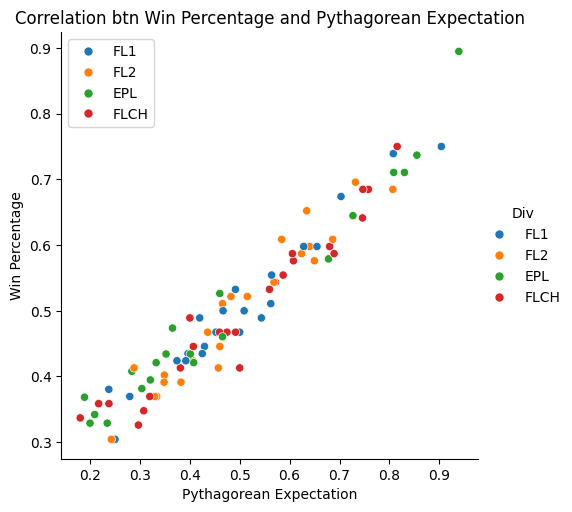

In [50]:
# Generate the correlation using a scatter plot btn wpc and pyth_e
plt.figure(figsize=(10,8))
sns.relplot(x='pyth_e', y='wpc', data=epl_df, hue='Div')
plt.title('Correlation btn Win Percentage and Pythagorean Expectation')
plt.ylabel('Win Percentage')
plt.xlabel('Pythagorean Expectation')
plt.legend()
plt.show()

From the plot, the win percentage is directly proportional to the pythagorean expectation, the higher the wpc the higher the pyth.

<Figure size 1000x800 with 0 Axes>

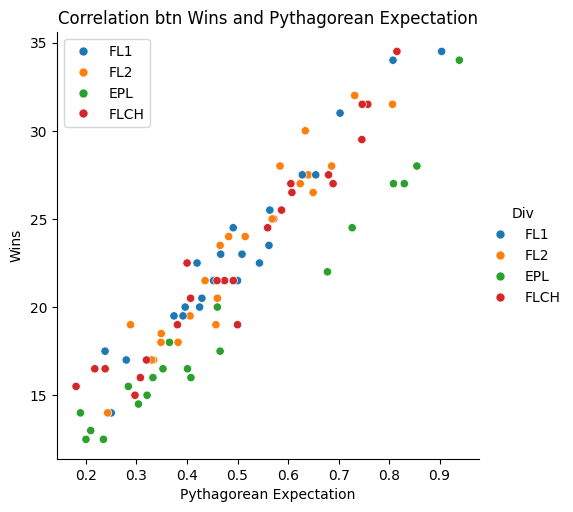

In [54]:
# Generate the correlation using a scatter plot btn wins and pyth_e
plt.figure(figsize=(10,8))
sns.relplot(x='pyth_e', y='W', data=epl_df, hue='Div')
plt.title('Correlation btn Wins and Pythagorean Expectation')
plt.ylabel('Wins')
plt.xlabel('Pythagorean Expectation')
plt.legend()
plt.show()

From the plot, as the pythagorean expectation increases so does the number of wins a particular club manages

In [56]:
# Run the regression against pyth and wpc

pyth_lm = smf.ols(formula = 'wpc ~ pyth_e', data=epl_df).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wpc   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     1265.
Date:                Thu, 19 Sep 2024   Prob (F-statistic):           8.87e-55
Time:                        07:53:32   Log-Likelihood:                 187.39
No. Observations:                  92   AIC:                            -370.8
Df Residuals:                      90   BIC:                            -365.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1803      0.010     18.804      0.000       0.161       0.199
pyth_e         0.6502      0.018     35.561      0.000       0.614       0.687
==============================================================================
Omnibus:                        3.561   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.169   Jarque-Bera (JB):                2.898
Skew:                           0.327   Prob(JB):                        0.235
Kurtosis:                       3.574   Cond. No.                         6.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# Run the regression

pyth_lm = smf.ols(formula = 'W ~ pyth_e', data=epl_df).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     647.6
Date:                Thu, 19 Sep 2024   Prob (F-statistic):           6.91e-43
Time:                        07:55:10   Log-Likelihood:                -191.58
No. Observations:                  92   AIC:                             387.2
Df Residuals:                      90   BIC:                             392.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.0550      0.590     13.659      0.000       6.883       9.227
pyth_e        28.6229      1.125     25.449      0.000      26.388      30.857
==============================================================================
Omnibus:                        6.386   Durbin-Watson:                   2.155
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                5.874
Skew:                          -0.601   Prob(JB):                       0.0530
Kurtosis:                       3.295   Cond. No.                         6.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The pythogareon expectation has a better outcome when measured against the win percentage of a team compared to measuing it against the number of wins a team has. This is shown by the R-squared (0.934 to 0.878) respectively. 

We can therefore say that using the pythogareon expectation will yield a better prediction of whether a team will win or loose